# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
# I had to upload the CSV as a ZIP because it was to big so I need to unzip it first
import zipfile
with zipfile.ZipFile('chicago_crime.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('crime')

In [2]:
# Load the full dataset of Chicago Crime
import pandas as pd
from pandas import DataFrame

# Clean the Dataset
# Load the .csv as Pandas Dataframe
chicago_crime = pd.read_csv("crime/chicago_crime.csv")

In [3]:
# Change datetime to date
import datetime
from pandas import Series, DataFrame
s = chicago_crime['date'].str.split(' ').apply(Series, 1)
s.name = 'date'
del chicago_crime['date']
chicago_crime = chicago_crime.join(s)

# Name the date column
chicago_crime.columns = ['Unnamed: 0','unique_key','case_number','block','iucr','primary_type','description','location_description','arrest','domestic','beat','district','ward','community_area','fbi_code','x_coordinate','y_coordinate','year','updated_on','latitude','longitude','location','date']

from sklearn import preprocessing as pr

#Drop unnecesary columns
chicago_crime = chicago_crime.drop(['Unnamed: 0','location','iucr','beat','x_coordinate','y_coordinate','updated_on'], axis = 1)
chicago_crime.head()

,unique_key,case_number,block,primary_type,description,location_description,arrest,domestic,district,ward,community_area,fbi_code,year,latitude,longitude,date
0,11736749,JC323564,133XX S PRAIRIE AVE,OTHER OFFENSE,VEHICLE TITLE/REG OFFENSE,STREET,True,False,5,9.0,54.0,26,2019,41.652934,-87.615626,2019-06-26
1,11742960,JC331059,023XX S NORMAL AVE,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,False,False,9,25.0,34.0,03,2019,41.849609,-87.640604,2019-07-02
2,11744041,JC332346,054XX N NEENAH AVE,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE,False,False,16,45.0,10.0,14,2019,41.979703,-87.790217,2019-07-02
3,11755670,JC346268,058XX N NORTHWEST HWY,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,True,False,16,41.0,10.0,02,2019,41.987332,-87.790163,2019-07-12
4,11815598,JC417697,062XX S CICERO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,AIRPORT EXTERIOR - SECURE AREA,False,False,8,23.0,64.0,24,2019,41.779260,-87.742321,2019-09-02


In [4]:
# Load the income data from previous years
# Load the .csv as Pandas Dataframe
income = pd.read_csv("Per_Capita_Income.csv")
income.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [5]:
#chicago_crime = chicago_crime.drop(['case_number','unique_key','block','ward','latitude','longitude','domestic','year'], axis = 1)
chicago_crime.dropna(axis='columns')

# Get names of indexes for which column Age has value 30
indexNames = chicago_crime[ chicago_crime['community_area'] == 0 ].index
 
# Delete these row indexes from dataFrame
chicago_crime.drop(indexNames , inplace=True)

In [6]:
# Group By community area
crime_by_CA = chicago_crime.groupby(by = 'community_area')
crime_by_CA.head()
crime_by_CA.describe()

district     latitude    longitude    unique_key  \
community_area                                                              
1.0            count  3509.000000  3473.000000  3473.000000  3.509000e+03   
               mean     24.000000    42.012044   -87.670458  1.173418e+07   
               std       0.000000     0.007350     0.006054  4.971367e+05   
               min      24.000000    41.997988   -87.684551  2.462100e+04   
               25%      24.000000    42.005849   -87.674922  1.166052e+07   
               50%      24.000000    42.013827   -87.670904  1.175967e+07   
               75%      24.000000    42.018498   -87.665712  1.184626e+07   
               max      24.000000    42.022567   -87.656656  1.200431e+07   
2.0            count  2961.000000  2943.000000  2943.000000  2.961000e+03   
               mean     23.573117    41.999679   -87.693029  1.174675e+07   
               std       1.235240     0.008798     0.008080  3.245651e+05   
               min      20.000000    41.983095   -87.709677  2.440900e+04   
               25%      24.000000    41.993552   -87.699557  1.166397e+07   
               50%      24.000000    41.997827   -87.692438  1.175274e+07   
               75%      24.000000    42.005630   -87.687289  1.185010e+07   
               max      24.000000    42.019530   -87.675335  1.201301e+07   
3.0            count  2967.000000  2931.000000  2931.000000  2.967000e+03   
               mean     19.317492    41.966183   -87.657072  1.175173e+07   
               std       0.465579     0.005442     0.006324  1.121759e+05   
               min      19.000000    41.954390   -87.674198  1.155271e+07   
               25%      19.000000    41.962457   -87.659797  1.165653e+07   
               50%      19.000000    41.965726   -87.656017  1.175147e+07   
               75%      20.000000    41.970439   -87.653303  1.184662e+07   
               max      20.000000    41.976830   -87.634921  1.201271e+07   
4.0            count  1622.000000  1602.000000  1602.000000  1.622000e+03   
               mean     19.688039    41.972308   -87.688921  1.175782e+07   
               std       0.463437     0.005890     0.007365  1.127851e+05   
               min      19.000000    41.961278   -87.704883  1.155316e+07   
               25%      19.000000    41.967703   -87.693861  1.166248e+07   
               50%      20.000000    41.972398   -87.689853  1.176077e+07   
...                           ...          ...          ...           ...   
74.0           std       0.000000     0.007513     0.008155  1.155838e+05   
               min      22.000000    41.680970   -87.739547  1.155315e+07   
               25%      22.000000    41.690846   -87.714178  1.166700e+07   
               50%      22.000000    41.696526   -87.706147  1.177309e+07   
               75%      22.000000    41.703381   -87.700787  1.186674e+07   
               max      22.000000    41.713289   -87.696408  1.199522e+07   
75.0           count  1505.000000  1501.000000  1501.000000  1.505000e+03   
               mean     22.000000    41.688959   -87.663650  1.171881e+07   
               std       0.000000     0.005814     0.012068  6.141133e+05   
               min      22.000000    41.677237   -87.690370  2.447000e+04   
               25%      22.000000    41.684790   -87.671550  1.165388e+07   
               50%      22.000000    41.689867   -87.662951  1.175024e+07   
               75%      22.000000    41.693103   -87.654470  1.184385e+07   
               max      22.000000    41.699627   -87.642190  1.200434e+07   
76.0           count  1518.000000  1497.000000  1497.000000  1.518000e+03   
               mean     16.009881    41.978294   -87.886772  1.175804e+07   
               std       0.384995     0.008874     0.025286  1.160643e+05   
               min      16.000000    41.937510   -87.934567  1.155287e+07   
               25%      16.000000    41.976290   -87.905227  1.166088e+07   
               50%   

In [7]:
# Get the number of crimes by community area
crimes = crime_by_CA.agg(['count'])['primary_type']
crimes.head()

,count
community_area,
1.0,3509
2.0,2961
3.0,2967
4.0,1622
5.0,1194


In [8]:
# Create a DF with the Community Area and the number of crimes
import numpy as np

community_areas = np.array(chicago_crime['community_area'])
community_areas = np.unique(community_areas)
community_areas = community_areas[~np.isnan(community_areas)]
community_areas.astype(int)

count_by_CA = np.array(crimes['count'])
count_by_CA

CA_names = np.array(income['COMMUNITY AREA NAME'])
CA_names = CA_names[:-1]
CA_names

df_plot = pd.DataFrame(community_areas, count_by_CA)
df_plot = pd.DataFrame({'CA':community_areas,'CA Name':CA_names ,'Crimes':count_by_CA})
#df_plot['CA'].astype(int)
df_plot.head()

,CA,CA Name,Crimes
0,1.0,Rogers Park,3509
1,2.0,West Ridge,2961
2,3.0,Uptown,2967
3,4.0,Lincoln Square,1622
4,5.0,North Center,1194


## Plot the crimes per community area

<IPython.core.display.Javascript object>


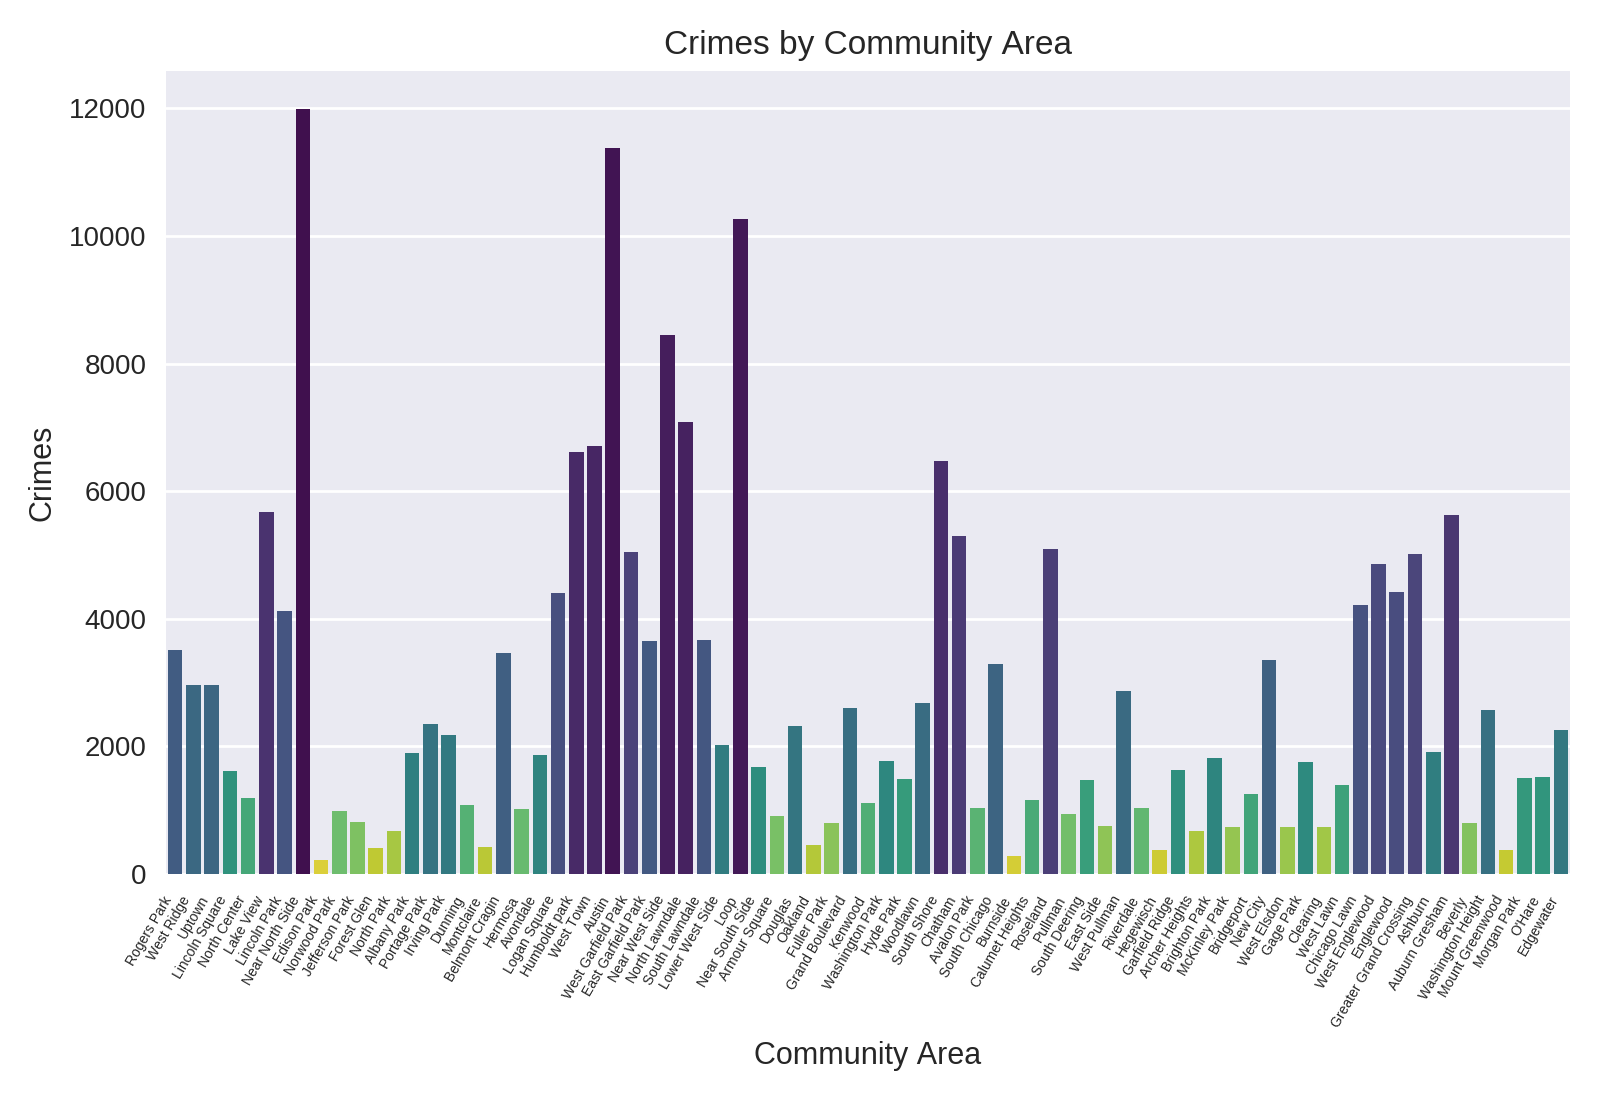

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
%matplotlib notebook

plt.title('Crimes by Community Area')
pal = sns.color_palette("viridis", len(df_plot))
rank = df_plot['Crimes'].argsort().argsort() 
fig = sns.barplot(x='CA Name', y='Crimes',data = df_plot, palette=np.array(pal[::-1])[rank])
plt.xlabel('Community Area')
plt.ylabel('Crimes')
fig.set_xticklabels(CA_names, rotation=60, ha='right')
plt.xticks(rotation=60, fontsize=5)
#fig.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()


## Combine with the Per Capita Income

<IPython.core.display.Javascript object>


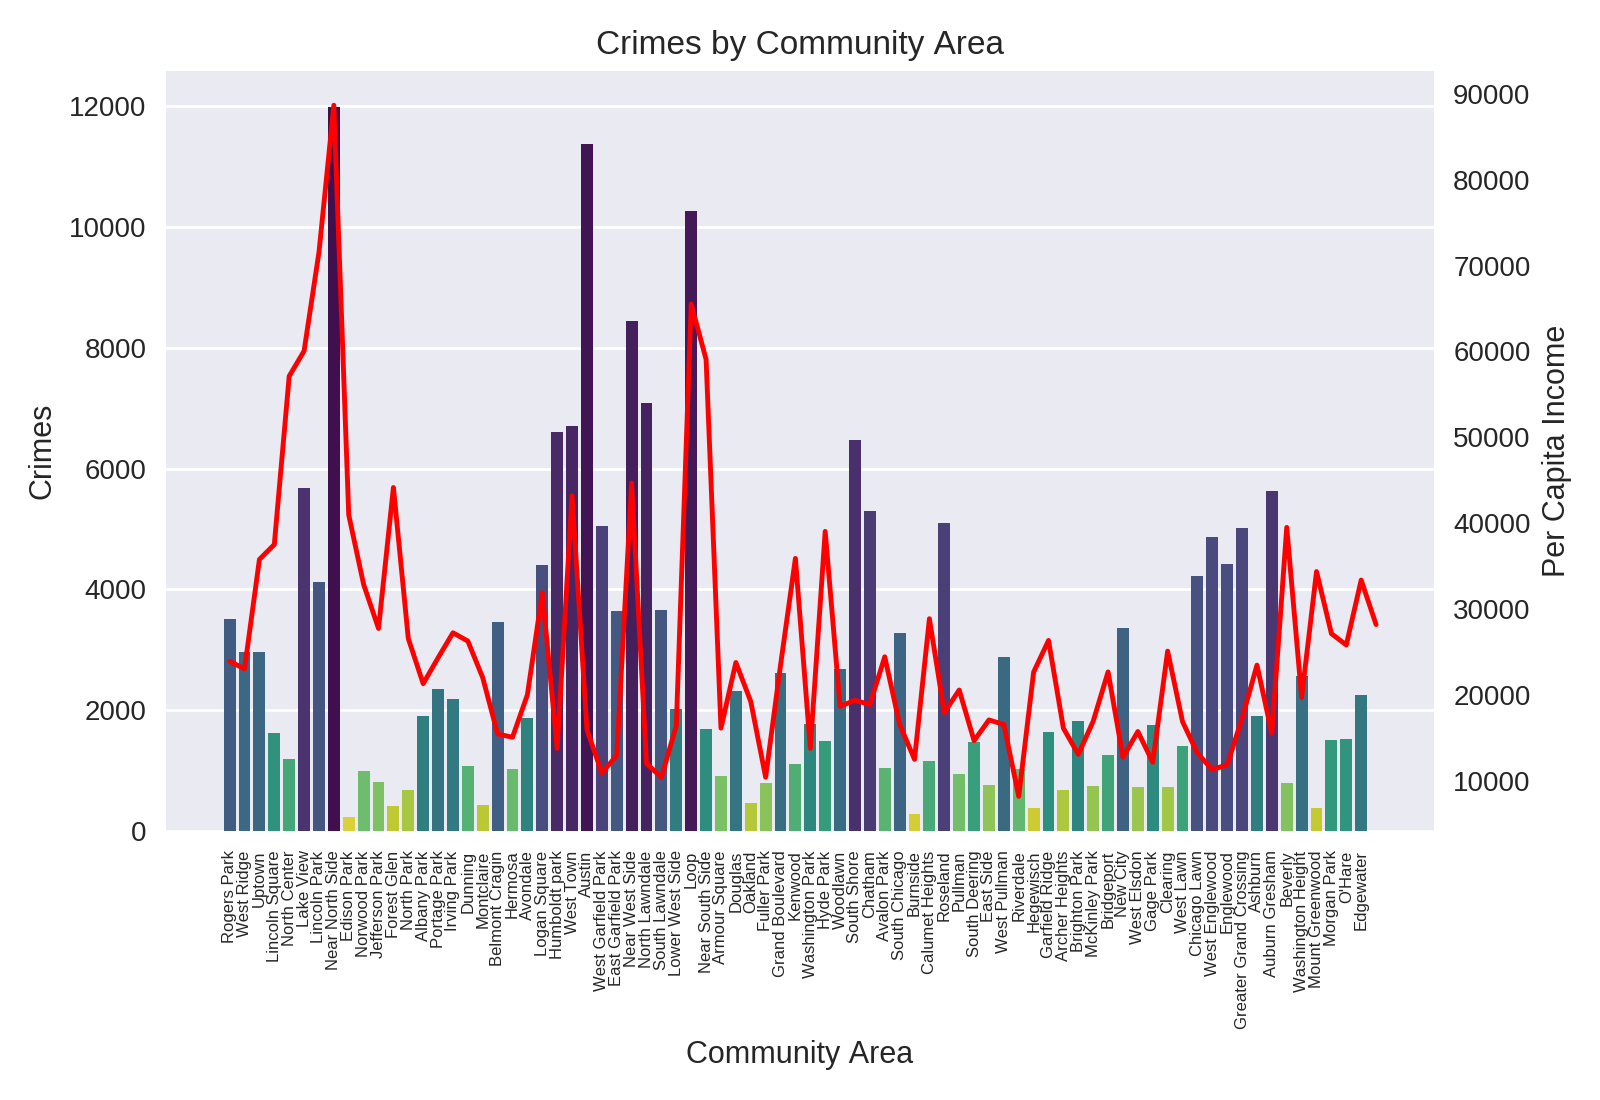

In [31]:
income.columns
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
%matplotlib notebook

plt.title('Crimes by Community Area')
pal = sns.color_palette("viridis", len(df_plot))
rank = df_plot['Crimes'].argsort().argsort() 
fig = sns.barplot(x='CA Name', y='Crimes',data = df_plot, palette=np.array(pal[::-1])[rank])
plt.xlabel('Community Area')
plt.ylabel('Crimes')
fig.set_xticklabels(CA_names, rotation=90, ha='center')
plt.xticks(rotation=90, fontsize=6)
#fig.subplots_adjust(bottom=0.2)

ax2 = fig.twinx()
ax2.plot(pd.Series(np.array(income["PER CAPITA INCOME "])), color='r')
ax2.grid(False)
ax2.set_ylabel('Per Capita Income')


plt.tight_layout()
plt.show()

## Let's target only thefts 

In [13]:
# Get names of indexes for which column Age has value 30
theft = chicago_crime[ chicago_crime['primary_type'] == "THEFT" ]
#Drop unnecesary columns
theft = theft.drop(['unique_key','case_number','block','ward','longitude','latitude','domestic','year'], axis = 1)
theft.head()

,primary_type,description,location_description,arrest,district,community_area,fbi_code,date
14,THEFT,ATTEMPT THEFT,SMALL RETAIL STORE,False,17,13.0,06,2019-02-13
22,THEFT,ATTEMPT THEFT,RESIDENCE PORCH/HALLWAY,True,22,72.0,06,2019-06-27
35,THEFT,PURSE-SNATCHING,STREET,False,4,48.0,06,2019-02-22
64,THEFT,DELIVERY CONTAINER THEFT,OTHER RAILROAD PROP / TRAIN DEPOT,False,4,45.0,06,2019-03-13
128,THEFT,DELIVERY CONTAINER THEFT,VEHICLE - DELIVERY TRUCK,False,9,37.0,06,2019-08-17


In [14]:
# Group by CA
thefts_by_CA = theft.groupby(by = 'community_area')
thefts_by_CA.head()
thefts_by_CA.describe()

district
community_area                   
1.0            count  1198.000000
               mean     24.000000
               std       0.000000
               min      24.000000
               25%      24.000000
               50%      24.000000
               75%      24.000000
               max      24.000000
2.0            count   905.000000
               mean     23.593370
               std       1.209458
               min      20.000000
               25%      24.000000
               50%      24.000000
               75%      24.000000
               max      24.000000
3.0            count   922.000000
               mean     19.274403
               std       0.446455
               min      19.000000
               25%      19.000000
               50%      19.000000
               75%      20.000000
               max      20.000000
4.0            count   534.000000
               mean     19.657303
               std       0.475056
               min      19.000000
               25%      19.000000
               50%      20.000000
...                           ...
74.0           std       0.000000
               min      22.000000
               25%      22.000000
               50%      22.000000
               75%      22.000000
               max      22.000000
75.0           count   397.000000
               mean     22.000000
               std       0.000000
               min      22.000000
               25%      22.000000
               50%      22.000000
               75%      22.000000
               max      22.000000
76.0           count   535.000000
               mean     16.028037
               std       0.648507
               min      16.000000
               25%      16.000000
               50%      16.000000
               75%      16.000000
               max      31.000000
77.0           count   828.000000
               mean     21.299517
               std       1.874451
               min      20.000000
               25%      20.000000
               50%      20.000000
               75%      24.000000
               max      24.000000

[616 rows x 1 columns]

In [15]:
# Create the DF with the CAs and the thefts
thefts = thefts_by_CA.agg(['count'])['primary_type']
thefts.head()

count_thefts_by_CA = np.array(thefts['count'])

df_plot_thefts = pd.DataFrame(community_areas, count_thefts_by_CA)
df_plot_thefts = pd.DataFrame({'CA':community_areas,'CA Name':CA_names ,'Thefts':count_thefts_by_CA})
#df_plot['CA'].astype(int)
df_plot_thefts.head()

,CA,CA Name,Thefts
0,1.0,Rogers Park,1198
1,2.0,West Ridge,905
2,3.0,Uptown,922
3,4.0,Lincoln Square,534
4,5.0,North Center,462


In [1]:
#income.columns
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML

%matplotlib notebook

#plt.title('Thefts by Community Area')
pal = sns.color_palette("viridis", len(df_plot_thefts))
rank = df_plot_thefts['Thefts'].argsort().argsort() 
fig = sns.barplot(x='CA Name', y='Thefts',data = df_plot_thefts, palette=np.array(pal[::-1])[rank])
plt.xlabel('Community Area')
fig.set_ylabel('Thefts')
fig.set_xticklabels(CA_names, rotation=90, ha='right')
plt.xticks(rotation=90, fontsize=6)
#fig.subplots_adjust(bottom=0.2)
ax2 = fig.twinx()
ax2.set_ylabel("Per Capita Income")
ax2.plot(pd.Series(np.array(income["PER CAPITA INCOME "])), color='r')
ax2.grid(False)

def onclick(event):
    plt.cla()
    pal = sns.color_palette("viridis", len(df_plot_thefts))
    rank = df_plot_thefts['Thefts'].argsort().argsort() 
    fig = sns.barplot(x='CA Name', y='Thefts',data = df_plot_thefts, palette=np.array(pal[::-1])[rank])
    plt.xlabel('Community Area')
    fig.set_ylabel('')
    fig.set_xticklabels(CA_names, rotation=90, ha='right')
    plt.xticks(rotation=90, fontsize=6)
    #fig.subplots_adjust(bottom=0.2)
    ax2 = fig.twinx()
    ax2.set_ylabel("Per Capita Income")
    ax2.plot(pd.Series(np.array(income["PER CAPITA INCOME "])), color='r')
    ax2.grid(False)
    plt.gca().set_title('Community Area: {},Per Capita Income: {} $'.format(CA_names[int(event.xdata)],"%.2f" % event.ydata))
    plt.tight_layout()

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

plt.tight_layout()
plt.show()

NameError: name 'df_plot_thefts' is not defined